<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

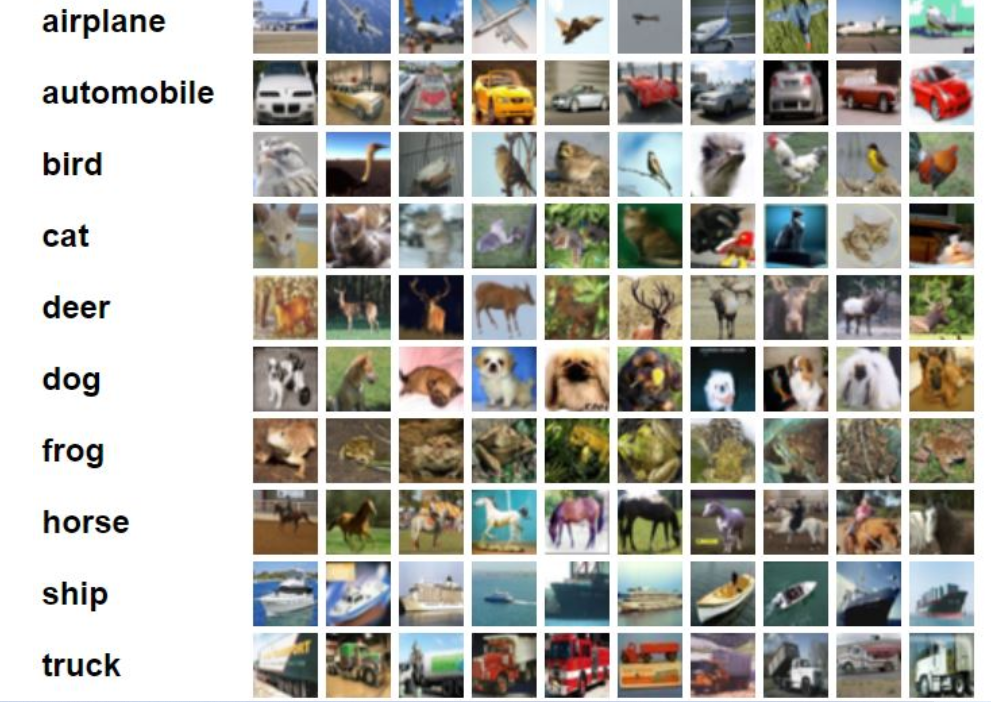

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data() #Tensorflow image dataset
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 830s 5us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,) #Tensorflow has its own catagory like 6- frog, 9-truck

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

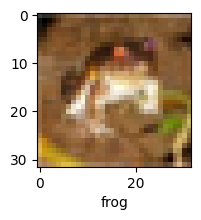

In [13]:
plot_sample(X_train, y_train, 0)

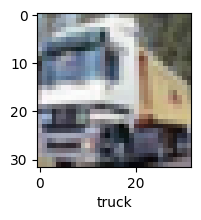

In [14]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [17]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),   #Input layer
        layers.Dense(3000, activation='relu'),   #Hidden layer
        layers.Dense(1000, activation='relu'),   #Hidden
        layers.Dense(10, activation='softmax')   #output 
    ])
#here we have y in 1,2,3,4,5,6,7,8,9 that is why we used sparse_categorical_crossentropy, if we have in 0 & 1 then categorical_crossentropy used.
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\DELL\anaconda3\envs\tensflow\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.3095 - loss: 1.9271
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.4197 - loss: 1.6419
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.4501 - loss: 1.5564
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.4763 - loss: 1.4843
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.4922 - loss: 1.4359


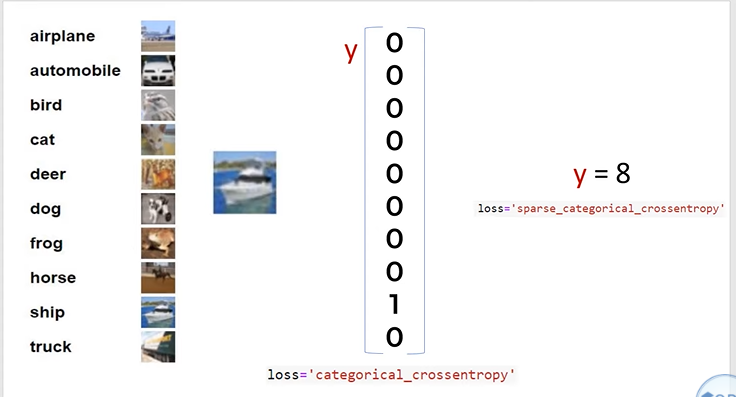

**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.35      0.75      0.48      1000
           1       0.66      0.52      0.58      1000
           2       0.24      0.58      0.34      1000
           3       0.40      0.27      0.32      1000
           4       0.45      0.26      0.33      1000
           5       0.56      0.20      0.30      1000
           6       0.49      0.49      0.49      1000
           7       0.67      0.40      0.50      1000
           8       0.60      0.52      0.56      1000
           9       0.65      0.41      0.50      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.44     10000
weighted avg       0.51      0.44      0.44     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\DELL\anaconda3\envs\tensflow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.3716 - loss: 1.7267
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5793 - loss: 1.1938
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6423 - loss: 1.0235
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6769 - loss: 0.9222
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7036 - loss: 0.8513
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7278 - loss: 0.7864
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7463 - loss: 0.7324
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7604 - loss: 0.6880
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7761 - loss: 0.6502
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7930 - loss: 0.5995


**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.9022 - accuracy: 0.7028


[0.9021560549736023, 0.7027999758720398]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.3996371e-04, 3.4844263e-05, 1.5558505e-03, 8.8400185e-01,
        1.9452239e-04, 3.5314459e-02, 7.2777577e-02, 6.9044131e-06,
        5.6417785e-03, 3.2224660e-05],
       [8.1062522e-03, 5.0841425e-02, 1.2453231e-07, 5.3348430e-07,
        9.1728407e-07, 1.0009186e-08, 2.8985988e-07, 1.7532484e-09,
        9.4089705e-01, 1.5346886e-04],
       [1.7055811e-02, 1.1841061e-01, 4.6799007e-05, 2.7727904e-02,
        1.0848254e-03, 1.0896578e-03, 1.3575243e-04, 2.8652203e-04,
        7.8895986e-01, 4.5202184e-02],
       [3.1300801e-01, 1.1591638e-02, 1.1511055e-02, 3.9592334e-03,
        7.7280165e-03, 5.6289224e-05, 2.3531138e-04, 9.4204297e-06,
        6.5178138e-01, 1.1968113e-04],
       [1.3230885e-05, 2.1221960e-05, 9.2594400e-02, 3.3585075e-02,
        4.4722903e-01, 4.1028224e-03, 4.2241842e-01, 2.8064171e-05,
        6.6392668e-06, 1.0745022e-06]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

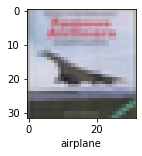

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'ship'

In [24]:
classes[y_classes[3]]

'ship'

<h3 style='color:purple'>Exercise</h3>

Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference:
https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb

Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link: [Solution](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/16_cnn_cifar10_small_image_classification/cnn_mnist_exercise_solution.ipynb)